# NLTK

In [2]:
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger_eng')

In [192]:
import nltk
from nltk.tokenize import word_tokenize
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of south America."

token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'south',
 'America',
 '.']

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, '.': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, ...})

In [8]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('.', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1)]

<Axes: xlabel='Key'>

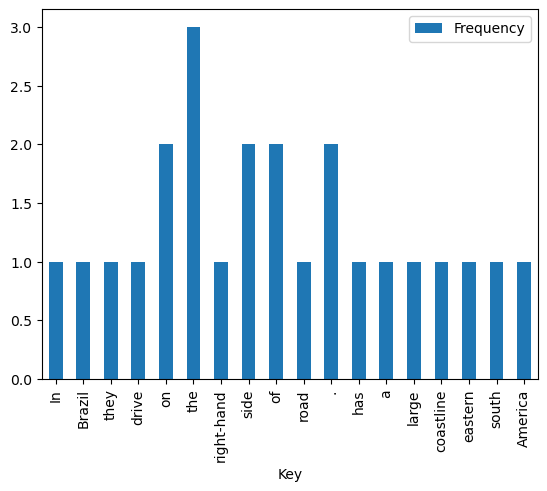

In [17]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind = 'bar')

In [18]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in FUnchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())

stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


### Stemming dan Lemmatization

In [19]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

In [27]:
S = 'presumably I would like to MuliPly my provision, saying tHat without crYing'
print('Sentence :', S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'Snowball']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name,': ',' '.join(st.stem(s) for s in S.split()))

Sentence : presumably I would like to MuliPly my provision, saying tHat without crYing
Lancaster :  presum i would lik to muliply my provision, say that without cry
Porter :  presum i would like to mulipli my provision, say that without cri
Snowball :  presum i would like to mulipli my provision, say that without cri


In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks :', lemmatizer.lemmatize('rocks'))
print('corpora :', lemmatizer.lemmatize('corpora'))

rocks : rock
corpora : corpus


In [39]:
from nltk import pos_tag

S = 'I am currently learning NLP in English, but if I possible want to know NLP in Indonesian language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('I', 'PRP'), ('possible', 'JJ'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


# TextBlob

In [41]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).words

print(sentence_tokens)

print([str(sent) for sent in sentence_tokens])


['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']


In [42]:
from textblob import Word

print("Stem: ", Word("running").stem())

print("Lemmatize: ", Word("running").lemmatize("v"))

Stem:  run
Lemmatize:  run


In [44]:
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

# Sastrawi

In [51]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau Online. Menurut Andi belanja online lebih praktis dan menghemat waktu."
stop = stopword.remove(kalimat.lower())
print(stop)


andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis menghemat waktu.


In [52]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Berpergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


# Word Cloud

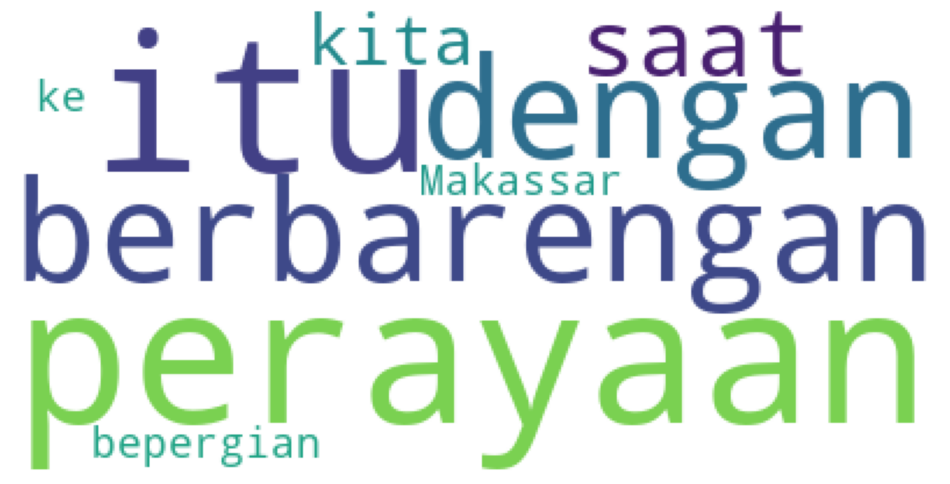

In [56]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = "White").generate(I)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

# Clustering

### Kmeans

In [195]:
import pickle
import os
import re
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [196]:
stop_words = set(stopwords.words('english'))
src_name = "20newsgroup.pckl"
src_path = os.path.join(os.getcwd(), src_name)
with open(src_path, 'rb') as file:
    data = pickle.load(file)

docs = [doc for doc in data.data]
label = data.target

In [197]:
def preprocess(doc):
  sents = word_tokenize(doc)
  sents_tok = list()
  sents = [t for t in sents if t not in stop_words]
  for s in sents:
    s = s.strip().lower()
    s = s.replace("\n"," ")
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    s = re.sub(' +', ' ', s)
    sents_tok.append(s)
  return " ".join(sents_tok)

In [198]:
docs_clear = list()
for d in docs:
  docs_clear.append(preprocess(d))

print('DONE!')

DONE!


In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed)
km.fit(X)

C_km = km.predict(X)
C_km[:10]

(1653, 10697)


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

### Kmeans++

In [12]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=seed)
kmPP.fit(X)
C_kmPP = kmPP.predict(X)
C_kmPP[:10]

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 1])

### DB Scan

In [13]:
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_dbscan = dbscan.labels_.astype(int)
C_dbscan[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### Evaluasi Clustering

##### Silhoutte Score

In [14]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmPP, C_dbscan]

for res in C:
  print(siluet(X, res))

0.016981615567284915
0.013605182832831979
-0.23697524589624636


##### Homogeneity Score

In [15]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
  print(purity(label, res), end = ', ')

0.2500029197546111, 0.1027322184051205, 0.0015549989772357536, 

##### NMI

In [17]:
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
  print(NMI(label, res), end = ', ')

0.3112369523534145, 0.11893244458208735, 0.002704356633566744, 

# Tugas Praktikum

### 3. Crawling Dataset

##### (041): 01: Kab dan kota jatim:
> https://id.wikipedia.org/wiki/Daftar_kabupaten_dan_kota_di_Jawa_Timur

Import Library

In [4]:
import wikipedia
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
# Atur bahasa ke Indonesia
wikipedia.set_lang("id")

# Judul halaman utama yang berisi daftar
main_page_title = "Daftar kabupaten dan kota di Jawa Timur"
print(f"Mengakses halaman utama: '{main_page_title}'")

try:
    # 1. Ambil halaman utama
    page = wikipedia.page(main_page_title, auto_suggest=False)
    
    # 2. Ambil semua link dari halaman tersebut (INI BAGIAN YANG DIPERBAIKI)
    all_links = page.links
    
    # 3. Saring link untuk hanya mengambil nama Kabupaten dan Kota
    city_regency_links = [
        title for title in all_links 
        if title.startswith("Kabupaten ") or title.startswith("Kota ")
    ]
    print(f"Berhasil menemukan {len(city_regency_links)} link kabupaten/kota yang relevan.")

    # 4. Ambil 10 link pertama untuk di-crawl
    links_to_crawl = city_regency_links[:10]
    
    # 5. Crawl konten dari 10 link tersebut
    crawled_data = []
    print(f"\nMengunduh konten dari {len(links_to_crawl)} artikel pertama...")
    for title in links_to_crawl:
        try:
            article = wikipedia.page(title, auto_suggest=False)
            crawled_data.append({'judul': article.title, 'konten': article.content})
            print(f"  - Sukses mengambil '{article.title}'")
        except wikipedia.exceptions.PageError:
            print(f"  - Gagal mengambil '{title}': Halaman tidak ditemukan.")
        except Exception as e:
            print(f"  - Gagal mengambil '{title}': {e}")
            
    df = pd.DataFrame(crawled_data)
    print(f"\nCrawling selesai. Berhasil mendapatkan {len(df)} artikel.\n")

except Exception as e:
    print(f"Gagal memproses halaman utama: {e}")
    df = pd.DataFrame() # Buat dataframe kosong jika gagal
    
# Simpan ke CSV jika dataframe tidak kosong
if not df.empty:
    df.to_csv("data_kab_kota_jatim.csv", index=False, encoding="utf-8-sig")
    print("Dataset berhasil disimpan ke data_kab_kota_jatim.csv")
else:
    print("Tidak ada data untuk disimpan karena proses crawling gagal.")

Mengakses halaman utama: 'Daftar kabupaten dan kota di Jawa Timur'
Berhasil menemukan 64 link kabupaten/kota yang relevan.

Mengunduh konten dari 10 artikel pertama...
  - Sukses mengambil 'Kabupaten Bangkalan'
  - Sukses mengambil 'Kabupaten Banyuwangi'
  - Sukses mengambil 'Kabupaten Blitar'
  - Sukses mengambil 'Kabupaten Bojonegoro'
  - Sukses mengambil 'Kabupaten Bondowoso'
  - Sukses mengambil 'Kabupaten Gresik'
  - Sukses mengambil 'Kabupaten Jember'
  - Sukses mengambil 'Kabupaten Jombang'
  - Sukses mengambil 'Kabupaten Kediri'
  - Sukses mengambil 'Kabupaten Lamongan'

Crawling selesai. Berhasil mendapatkan 10 artikel.

Dataset berhasil disimpan ke data_kab_kota_jatim.csv


In [6]:
# --- Langkah 2: Preprocessing Teks dengan Sastrawi ---
print("Langkah 2: Memulai preprocessing teks...")

# Inisialisasi Stemmer dan Stopword Remover
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()
factory_stopword = StopWordRemoverFactory()
stopwords = factory_stopword.get_stop_words()

def preprocess_text_sastrawi(text):
    text = text.lower()
    text = re.sub(r'\[\d+\]', '', text) # Hapus sitasi seperti [1], [2], dll.
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    tokens_stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens_stemmed)

df['konten_bersih'] = df['konten'].apply(preprocess_text_sastrawi)
print("Preprocessing selesai.\n")
print("Contoh hasil preprocessing:")
print(df[['judul', 'konten_bersih']].head())
print("-" * 50)


Langkah 2: Memulai preprocessing teks...
Preprocessing selesai.

Contoh hasil preprocessing:
                  judul                                      konten_bersih
0   Kabupaten Bangkalan  kabupaten bangkal hanacaraka  pegon  lafal bah...
1  Kabupaten Banyuwangi  kabupaten banyuwangi hanacaraka  pegon  lafal ...
2      Kabupaten Blitar  kabupaten blitar bahasa jawa hanacaraka  pegon...
3  Kabupaten Bojonegoro  kabupaten bojonegoro bahasa jawa hanacaraka  p...
4   Kabupaten Bondowoso  kabupaten bondowoso hanacaraka  pegon  lafal b...
--------------------------------------------------


In [7]:
bersih = df['konten_bersih'].tolist()

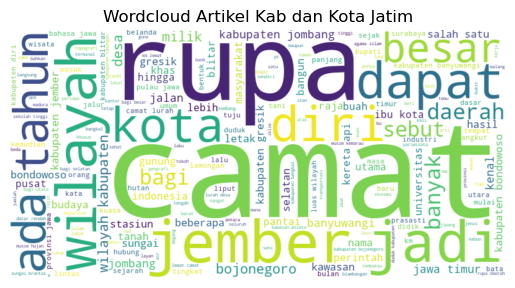

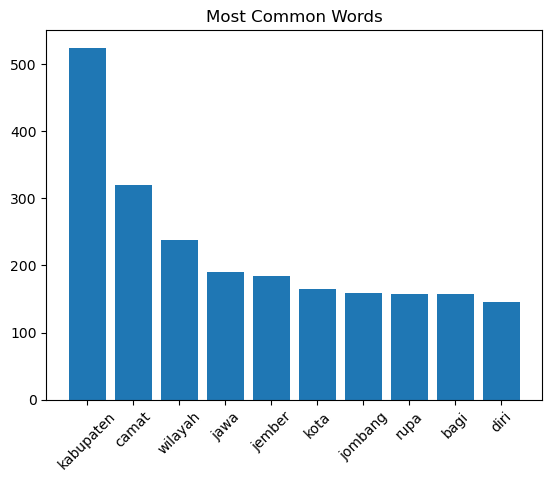

In [8]:
all_tokens = " ".join(bersih).split()

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Artikel Kab dan Kota Jatim")
plt.show()

counts = Counter(all_tokens).most_common(10)
words, freq = zip(*counts)
plt.bar(words, freq)
plt.xticks(rotation=45)
plt.title("Most Common Words")
plt.show()

In [9]:
# --- Langkah 4: Clustering dengan TF-IDF dan K-Means ---
print("Langkah 4: Memulai proses clustering...")

# Membuat matriks TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(bersih)

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=300, random_state=146)
labels = kmeans.fit_predict(tfidf_matrix)

# Menambahkan hasil cluster ke DataFrame
df['cluster'] = kmeans.labels_
print("-" * 50)
print("Hasil Topik ke Cluster:")
print("-" * 50)
print(df[['judul', 'cluster']])
print("-" * 50)

Langkah 4: Memulai proses clustering...
--------------------------------------------------
Hasil Topik ke Cluster:
--------------------------------------------------
                  judul  cluster
0   Kabupaten Bangkalan        0
1  Kabupaten Banyuwangi        0
2      Kabupaten Blitar        1
3  Kabupaten Bojonegoro        1
4   Kabupaten Bondowoso        0
5      Kabupaten Gresik        0
6      Kabupaten Jember        0
7     Kabupaten Jombang        0
8      Kabupaten Kediri        1
9    Kabupaten Lamongan        2
--------------------------------------------------



Langkah 5: Membuat visualisasi cluster...


C:\Users\Arwen\AppData\Local\Temp\ipykernel_20076\3232915306.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(


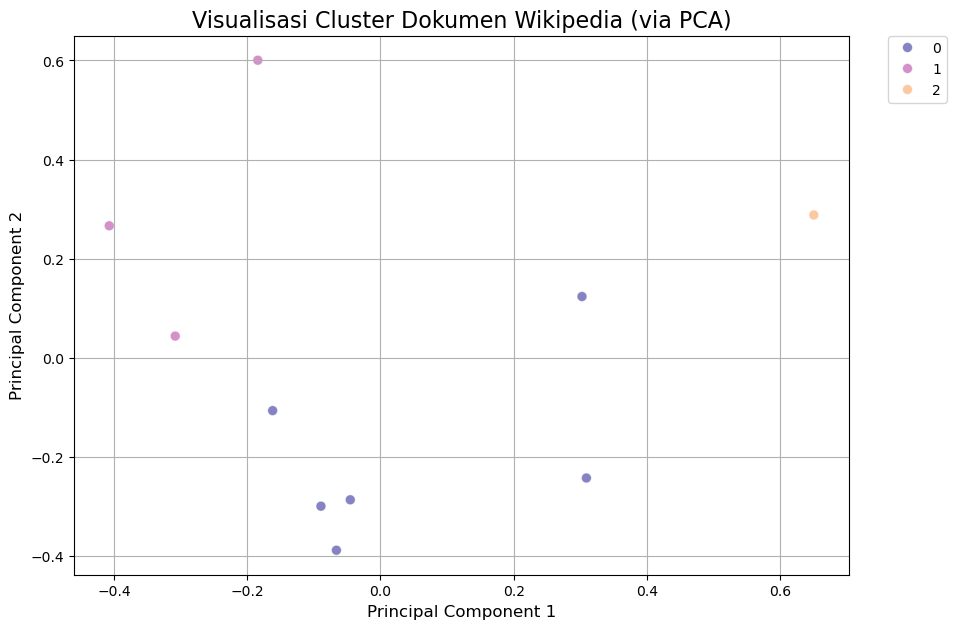

Visualisasi cluster berhasil dibuat.



In [11]:
import numpy as np
# --- Langkah 5: Visualisasi Cluster ---
print("\nLangkah 5: Membuat visualisasi cluster...")

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Buat DataFrame untuk plot
df_plot = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = df['cluster']
df_plot['judul'] = df['judul']

jumlah_cluster = df_plot['cluster'].nunique()
cmap = plt.get_cmap('plasma')
warna_pilihan = cmap(np.linspace(0, 0.75, jumlah_cluster))

# Membuat scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette=warna_pilihan,
    data=df_plot,
    legend="full",
    alpha=0.5,
    s = 50
)
plt.title('Visualisasi Cluster Dokumen Wikipedia (via PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()
print("Visualisasi cluster berhasil dibuat.\n")

In [ ]:
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.0101649774184699


In [2]:
# Kalimat contoh
text = "Jawa Timur merupakan salah satu Provinsi di Indonesia yang memiliki banyak Kota dan Kabupaten"
text_lower = text.lower() # Mengubah ke huruf kecil

# --- Persiapan ---
# Import pustaka yang dibutuhkan
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi stopwords NLTK untuk Bahasa Indonesia
list_stopwords_nltk = stopwords.words('indonesian')

# Inisialisasi Sastrawi
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword_remover = factory_stopword.create_stop_word_remover()


# --- Proses ---

# 1. NLTK
print("--- Hasil NLTK ---")
tokens_nltk = word_tokenize(text_lower)
print(f"Tokenisasi: {tokens_nltk}")

# Stopword removal NLTK
tokens_no_stopwords_nltk = [word for word in tokens_nltk if word not in list_stopwords_nltk]
print(f"Setelah Stopword Removal: {tokens_no_stopwords_nltk}")

# Stemming NLTK (TIDAK ADA STEMMER BAWAAN, jadi kata tetap sama)
print("Stemming: NLTK tidak punya stemmer Bahasa Indonesia bawaan.")
print(f"Hasil Akhir: {tokens_no_stopwords_nltk}\n")


# 2. TextBlob
print("--- Hasil TextBlob ---")
blob = TextBlob(text_lower)
tokens_tb = blob.words
print(f"Tokenisasi: {tokens_tb}")
# TextBlob tidak punya list stopword & stemmer untuk Indonesia,
# jika kita coba panggil .lemmatize, hasilnya akan salah.
stemmed_tb = [word.lemmatize() for word in tokens_tb]
print("Stemming: TextBlob menggunakan lemmatizer Inggris, hasilnya tidak relevan.")
print(f"Hasil Akhir (Salah): {stemmed_tb}\n")


# 3. Sastrawi (sering dikombinasikan dengan tokenizer NLTK)
print("--- Hasil Sastrawi ---")
# Kita gunakan tokenizer dari NLTK karena Sastrawi tidak memilikinya
tokens_sastrawi = word_tokenize(text_lower)
print(f"Tokenisasi (pakai NLTK): {tokens_sastrawi}")

# Stopword removal Sastrawi
text_no_stopwords_sastrawi = stopword_remover.remove(text_lower)
tokens_no_stopwords_sastrawi = word_tokenize(text_no_stopwords_sastrawi) # Tokenisasi ulang setelah stopword dihapus
print(f"Setelah Stopword Removal: {tokens_no_stopwords_sastrawi}")


# Stemming Sastrawi
stemmed_sastrawi = stemmer.stem(text_no_stopwords_sastrawi)
print(f"Stemming: Sastrawi berhasil mengubah ke kata dasar.")
# Sastrawi stemmer bekerja pada string, jadi kita split lagi
hasil_akhir_sastrawi = stemmed_sastrawi.split()
print(f"Hasil Akhir (Benar): {hasil_akhir_sastrawi}\n")

--- Hasil NLTK ---
Tokenisasi: ['jawa', 'timur', 'merupakan', 'salah', 'satu', 'provinsi', 'di', 'indonesia', 'yang', 'memiliki', 'banyak', 'kota', 'dan', 'kabupaten']
Setelah Stopword Removal: ['jawa', 'timur', 'salah', 'provinsi', 'indonesia', 'memiliki', 'kota', 'kabupaten']
Stemming: NLTK tidak punya stemmer Bahasa Indonesia bawaan.
Hasil Akhir: ['jawa', 'timur', 'salah', 'provinsi', 'indonesia', 'memiliki', 'kota', 'kabupaten']

--- Hasil TextBlob ---
Tokenisasi: ['jawa', 'timur', 'merupakan', 'salah', 'satu', 'provinsi', 'di', 'indonesia', 'yang', 'memiliki', 'banyak', 'kota', 'dan', 'kabupaten']
Stemming: TextBlob menggunakan lemmatizer Inggris, hasilnya tidak relevan.
Hasil Akhir (Salah): ['jawa', 'timur', 'merupakan', 'salah', 'satu', 'provinsi', 'di', 'indonesia', 'yang', 'memiliki', 'banyak', 'kota', 'dan', 'kabupaten']

--- Hasil Sastrawi ---
Tokenisasi (pakai NLTK): ['jawa', 'timur', 'merupakan', 'salah', 'satu', 'provinsi', 'di', 'indonesia', 'yang', 'memiliki', 'banyak',